# 📊 Sales Data Cleaning & Analysis using Python

## Data Loading & Initial Exploration (EDA – Part 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("superstore_ecommerce.csv", encoding="latin1")

In [3]:
df.shape

(9994, 21)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Data Cleaning & Preparation

### Standardize Column Names

In [7]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

### Remove Non-Informative Columns

In [8]:
df = df.drop(columns=["row_id"])
df.shape

(9994, 20)

### Fix Data Types (Dates)

In [9]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   ship_mode      9994 non-null   object        
 4   customer_id    9994 non-null   object        
 5   customer_name  9994 non-null   object        
 6   segment        9994 non-null   object        
 7   country        9994 non-null   object        
 8   city           9994 non-null   object        
 9   state          9994 non-null   object        
 10  postal_code    9994 non-null   int64         
 11  region         9994 non-null   object        
 12  product_id     9994 non-null   object        
 13  category       9994 non-null   object        
 14  sub_category   9994 non-null   object        
 15  product_name   9994 n

## Data Validation & Duplicate Handling

### Check Missing Values

In [10]:
df.isnull().sum()

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

### Identify Duplicate Order–Product Records

In [11]:
df.duplicated(subset=["order_id", "product_id"]).sum()

np.int64(8)

### Inspect duplicates

In [12]:
dupes = df[df.duplicated(subset=["order_id", "product_id"], keep=False)]
dupes.sort_values(["order_id", "product_id"])

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
6498,CA-2015-103135,2015-07-24,2015-07-28,Standard Class,SS-20515,Shirley Schmidt,Home Office,United States,Louisville,Kentucky,40214,South,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",135.090,9,0.0,62.1414
6500,CA-2015-103135,2015-07-24,2015-07-28,Standard Class,SS-20515,Shirley Schmidt,Home Office,United States,Louisville,Kentucky,40214,South,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",90.060,6,0.0,41.4276
350,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,24.560,2,0.0,11.5432
352,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,49.120,4,0.0,23.0864
1300,CA-2016-137043,2016-12-23,2016-12-25,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,Virginia,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",572.760,6,0.0,166.1004
1301,CA-2016-137043,2016-12-23,2016-12-25,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,Virginia,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",286.380,3,0.0,83.0502
9168,CA-2016-140571,2016-03-15,2016-03-19,Standard Class,SJ-20125,Sanjit Jacobs,Home Office,United States,Jackson,Mississippi,39212,South,OFF-PA-10001954,Office Supplies,Paper,Xerox 1964,319.760,14,0.0,147.0896
9169,CA-2016-140571,2016-03-15,2016-03-19,Standard Class,SJ-20125,Sanjit Jacobs,Home Office,United States,Jackson,Mississippi,39212,South,OFF-PA-10001954,Office Supplies,Paper,Xerox 1964,45.680,2,0.0,21.0128
7881,CA-2017-118017,2017-12-03,2017-12-06,Second Class,LC-16870,Lena Cacioppo,Consumer,United States,Thornton,Colorado,80229,West,TEC-AC-10002006,Technology,Accessories,Memorex Micro Travel Drive 16 GB,76.752,6,0.2,10.5534
7882,CA-2017-118017,2017-12-03,2017-12-06,Second Class,LC-16870,Lena Cacioppo,Consumer,United States,Thornton,Colorado,80229,West,TEC-AC-10002006,Technology,Accessories,Memorex Micro Travel Drive 16 GB,102.336,8,0.2,14.0712


### Remove True Duplicates

In [13]:
df = df.drop_duplicates()

### Aggregate Split Line Items

In [14]:
df = (
    df.groupby(
        [
            "order_id", "order_date", "ship_date", "ship_mode",
            "customer_id", "customer_name", "segment", "country",
            "city", "state", "postal_code", "region",
            "product_id", "category", "sub_category", "product_name",
            "discount"
        ],
        as_index=False
    )
    .agg({
        "sales": "sum",
        "quantity": "sum",
        "profit": "sum"
    })
)

### Validation

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.duplicated(subset=["order_id", "product_id"]).sum()

np.int64(0)

## Feature Engineering

### Rename Sales to Revenue

In [17]:
df = df.rename(columns={"sales": "revenue"})

### Time-Based Features

In [18]:
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month
df["order_month_name"] = df["order_date"].dt.month_name()
df["year_month"] = df["order_date"].dt.to_period("M")

In [19]:
df[["order_date", "order_year", "order_month_name", "year_month"]].head()

,order_date,order_year,order_month_name,year_month
0,2014-09-07,2014,September,2014-09
1,2014-07-08,2014,July,2014-07
2,2014-07-08,2014,July,2014-07
3,2014-03-14,2014,March,2014-03
4,2014-01-28,2014,January,2014-01


### Shipping Performance

In [20]:
df["shipping_days"] = (df["ship_date"] - df["order_date"]).dt.days
df["shipping_days"].describe()

count    9986.000000
mean        3.958542
std         1.747875
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: shipping_days, dtype: float64

### Profit Margin

In [21]:
df["profit_margin"] = df["profit"] / df["revenue"]
df = df.replace([np.inf, -np.inf], 0)

df["profit_margin"].describe()

count    9986.000000
mean        0.120185
std         0.466894
min        -2.750000
25%         0.075000
50%         0.270000
75%         0.362500
max         0.500000
Name: profit_margin, dtype: float64

##  Business KPIs (Executive Summary)

In [22]:
total_revenue = df["revenue"].sum()
total_profit = df["profit"].sum()
total_orders = df["order_id"].nunique()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders:,}")

Total Revenue: $2,296,919.49
Total Profit: $286,409.08
Total Orders: 5,009


## Exploratory Data Analysis (EDA – Part 2)

### Revenue Trend Over Time

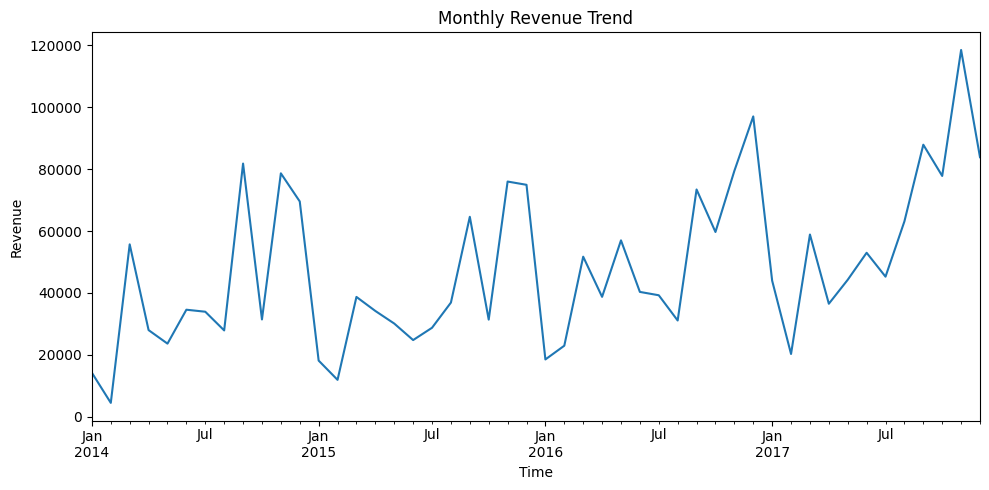

In [23]:
monthly_revenue = (
    df.groupby("year_month")["revenue"]
    .sum()
    .sort_index()
)

monthly_revenue.plot(kind="line", figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

### Top 10 Products by Revenue

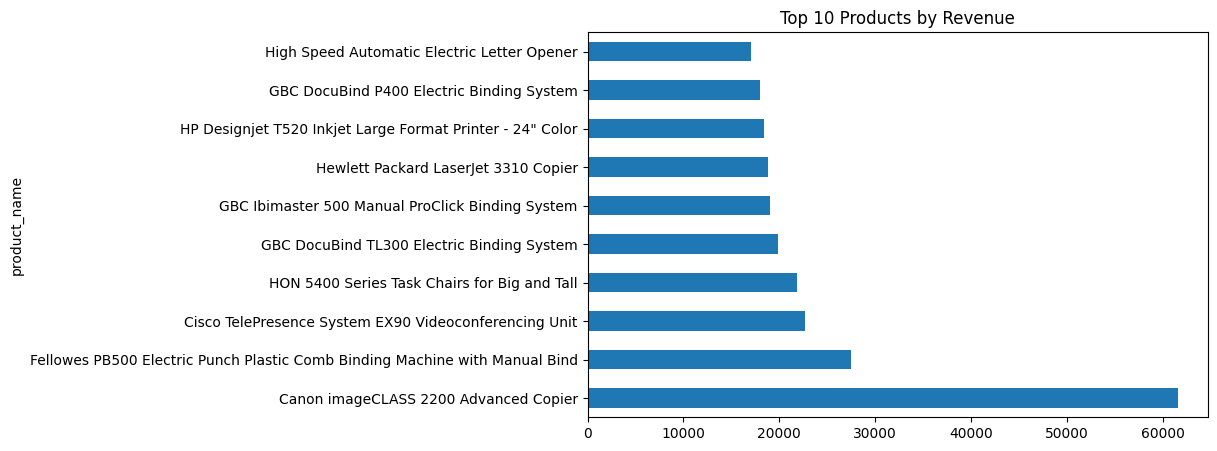

In [24]:
top_products = (
    df.groupby("product_name")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="barh", figsize=(8,5))
plt.title("Top 10 Products by Revenue")
plt.show()

### Category Performance

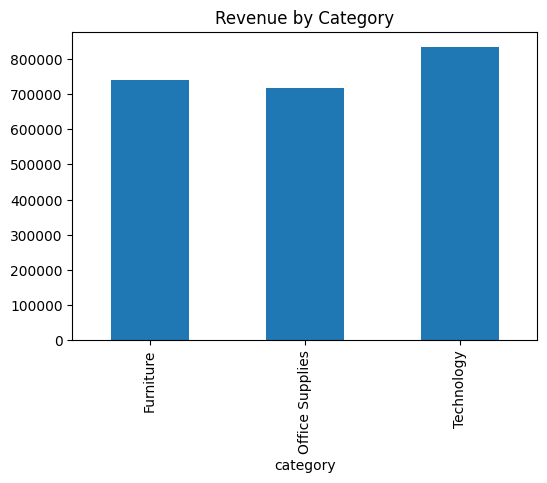

In [25]:
category_revenue = df.groupby("category")["revenue"].sum()

category_revenue.plot(kind="bar", figsize=(6,4))
plt.title("Revenue by Category")
plt.show()

### Discount vs Profit Analysis

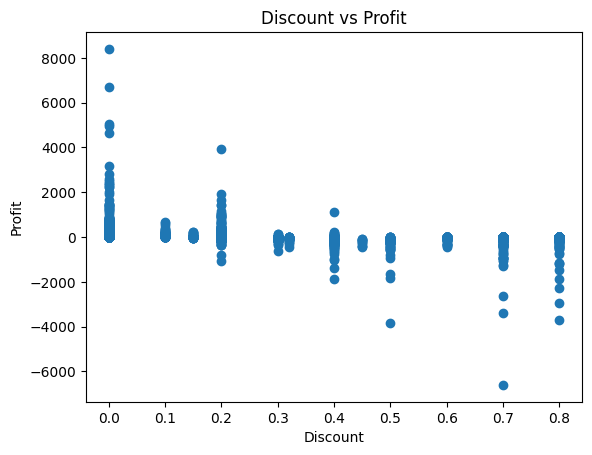

In [26]:
plt.scatter(df["discount"], df["profit"])
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

## Output & Data Pipeline Support

In [27]:
df.to_csv("superstore_final_clean.csv", index=False)